## Session 02, task D


See https://docs.opencv.org/4.1.2/db/d95/classcv_1_1ORB.html for documentation of Oriented BRIEF keypoint detector and descriptor,


In [1]:
import os

os.symlink('/Users/mix/repos/Python-for-Bioimage-Analysis/sessions/day01-image-processing-and-general-analysis/01_images-in-python/assets/bbbc034v1','./assets/bbbc034v1') 

FileExistsError: [Errno 17] File exists: '/Users/mix/repos/Python-for-Bioimage-Analysis/sessions/day01-image-processing-and-general-analysis/01_images-in-python/assets/bbbc034v1' -> './assets/bbbc034v1'

In [2]:
from skimage.io import imread #function to read images


#We will read in an image stackt from BBBC034 dataset
myStack = imread('./assets/bbbc034v1/AICS_12_134_C=1.tif')
# Take single slice
image = myStack[26,:,:]


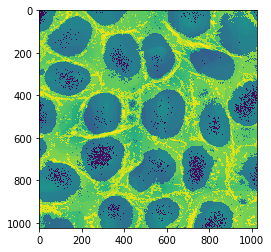

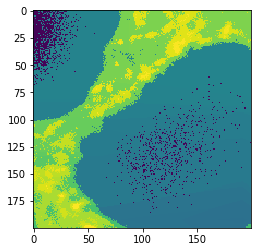

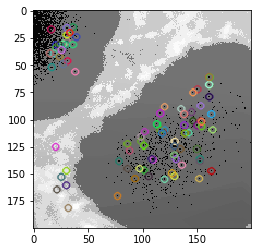

In [12]:
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
from skimage import exposure
import cv2

%matplotlib inline

orb = cv2.ORB_create(edgeThreshold=15, patchSize=20, nlevels=2, 
                     fastThreshold=20, scaleFactor=1.2, WTA_K=2,
                     scoreType=cv2.ORB_FAST_SCORE, firstLevel=3, 
                     nfeatures=100)


image=exposure.equalize_adapthist(image)

#Algorithms from different libraries can be peculiar about datatypes. 
#What will happen if you comment out next line? Will you be able to understand the error from OpenCV
image=img_as_ubyte(image) 
plt.imshow(image), 
plt.show()
image_focus = image[:200,:200]
plt.imshow(image_focus), 
plt.show()

# find the keypoints with ORB
keypoints_positions = orb.detect(image_focus,None)
# compute the descriptors with ORB
keypoints_positions, descriptors = orb.compute(image_focus, keypoints_positions)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(image_focus, keypoints_positions, None)
plt.imshow(img2)
plt.show()
